This CNN model was trained on our old dataset that included only 78 images. NOTE: this code also has a bunch of run-time errors and tensor errors. We are working on our new model that will be trained on a much larger dataset. 

### Install pytorch 

In [0]:
# use k fold cross validation
# use cross entropy for classification problems

import time
import platform
import io

import matplotlib.pyplot as plt
from google.colab import files
from matplotlib.pyplot import cm 

# import KFold from scikit-learn
from sklearn.model_selection import KFold

def install_pytorch():
    os = platform.system()
    if os == "Linux":
        !pip3 install http://download.pytorch.org/whl/cu90/torch-0.4.0-cp36-cp36m-linux_x86_64.whl
    elif os == "Windows":
        !pip3 install http://download.pytorch.org/whl/cu90/torch-0.4.0-cp36-cp36m-win_amd64.whl 
    !pip3 install torchvision


# Install PyTorch.
install_pytorch()


import torch
import torch.nn as nn
import torch.optim as optim

    100% |████████████████████████████████| 566.4MB 78.1MB/s 
tcmalloc: large alloc 1073750016 bytes == 0x5cf72000 @  0x7fdd1c5a01c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8
    100% |████████████████████████████████| 61kB 3.7MB/s 
    100% |████████████████████████████████| 2.0MB 10.3MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


### Enable GPU Usage

Models trains much more quickly with GPU. 

In [0]:
turn on GPU
use_gpu = torch.cuda.is_available()

print("GPU Available: {}".format(use_gpu))

## Dataset

### Import and read the CSV file 

In [0]:
#import csv dataset
import torchvision
import csv
import os
import pandas as pd 
from urllib import request
import requests

# Upload and read the csv file from the github repo

df = pd.read_csv("https://raw.githubusercontent.com/HelenG123/ai-alliance/master/brailleFinalv2.csv")

#https://raw.githubusercontent.com/HelenG123/ai-alliance/master/braille_data.csv
# # Read the CSV file from a local directory
# dataset_name = list(dataset.keys())[0]
# df = pd.read_csv(io.StringIO(dataset[dataset_name].decode('utf-8')))


### Iterate over the CSV files
Create a dictionary of the images that contains the image as a Tensor and its target as a one-hot encoded vector.

In [0]:
from scipy import misc
from io import BytesIO
import urllib
import cv2
import numpy as np
import tensorflow as tf

import urllib.request

from torchvision import transforms

data=[]

for i, row in df.iterrows():
  picture = []
  url = row['Labeled Data']
  label = row['External ID']
  curr_target = target[label[0]]

  x = urllib.request.urlopen(url)
  resp = x.read()
  image = np.array(bytearray(resp), dtype=np.uint8)
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)
  # resize image
  image = cv2.resize(image, (28, 28))
#   image = image.astype(np.float32)/255.0
#   image = image.flatten().astype(np.float32)/255.0
  image = torch.from_numpy(image)
  picture.append(image)
  curr_target=torch.Tensor(curr_target)
  picture.append(curr_target)
  data.append(picture)

print(image.shape) # these are the dimensions of our image
print(data[0][0])

### k-fold Cross Validation

Don't have enough data so need to generate more.

Copying the same dataset over and over again?

In [0]:
training_set = []
test_set = []

for i in range(100):
  training_set.append(data)
  
for i in range(30):
  test_set.append(data)

This k-fold code gives 3 sets of training and test sets.

In [0]:
# Implement k-fold Cross Validation
from sklearn.model_selection import KFold

kf = KFold(n_splits = 3)

training_set = []
test_set = []

# for testing: visualization purposes 
# We splitted the images id's in two: train and test
for train_index, test_index in kf.split(data): 
  print("TRAIN:", train_index, "TEST:", test_index)

for i in range (len(train_index)):
  training_set.append(data)

for i in range (len(test_index)):
  test_set.append(data)

  training_set.append(train_index)
  test_set.append(test_index)

for i in range(0:78)
  training_set[i] =  images[i][0]
  test_set[i]
print(training_set)
print()
print(test_set)

# Use this code if are using k-fold
new_training_set = []
# finds the position of the 
for array_i in range(len(training_set)):
  for curr_pos_i in range(len(training_set[array_i])):
    curr_training_index = training_set[array_i][curr_pos_i]
    curr_image = [curr_training_index][0]
    curr_target = data[curr_training_index][1]
#     print(curr_image)
    new_training_set.append(curr_image)
    new_training_set.append(curr_target)

print(new_training_set)
print(new_test_set)
    
# print(new_training_set[0][0])

new_test_set = []
for array_i in range(len(test_set)):
  for curr_pos_i in range(len(test_set[array_i])):
    curr_test_index = test_set[array_i][curr_pos_i]
    curr_image = data[curr_test_index][0]
    new_test_set.append(curr_image)
    new_test_set.append(curr_target)
#print(new_test_set), print(len(new_test_set))
# To test and display the indexes of the train and test data
# for train_index, test_index in kf.split(images):
#   print(train_index, test_index)


### Create training and test datasets


### Load the dataset

Dataloader gives a the object that we can iterate over so that we can enumerate and train our data.

In [0]:
batch_size = 5

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

### Generate the Targets
Create a dictionary that contains the one-hot encoding vector for each image in the Braille alphabet.


In [0]:
import string
alphabet = list(string.ascii_lowercase)

target = {}

# Initalize a target dict that has the letters as its keys and as its value
# an empty one-hot encoding of size 26
for letter in alphabet: 
  target[letter] = [0] * 26

# Do the one-hot encoding for each letter now 
curr_pos = 0 
for curr_letter in target.keys():
  target[curr_letter][curr_pos] = 1
  curr_pos += 1  

### Visualize the Image
Demonstrate that we can access and display an image from the dataset. 


Braille Target: Y/y


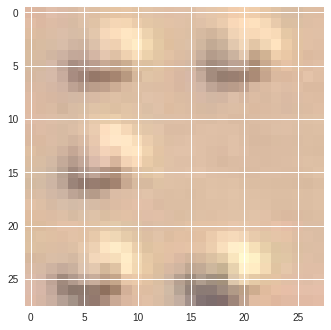

In [0]:
# Display 'y' in Brailles
import matplotlib.pyplot as plt
import numpy as np
dd = data[24][0].numpy()
print('Braille Target: Y/y')
plt.imshow(dd)
plt.show()


## CNN Model

### Define the Model

In [0]:
# import the nn.Module class
import torch.nn as nn

# defines the convolutional neural network
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.block1 = nn.Sequential(
            #3x28x28
            nn.Conv2d(in_channels=3, 
                      out_channels=16, 
                      kernel_size=5, 
                      stride=1, 
                      padding=2)
            #16x28x28
            nn.MaxPool2d(kernel_size=2),
            #16x14x14
        )
        #16x14x14
        self.block2 = nn.Sequential(
            nn.Conv2d(in_channels=16, 
                      out_channels=32, 
                      kernel_size=5, 
                      stride=1, 
                      padding=2)
            #32x14x14
            nn.MaxPool2d(kernel_size=2)
            #32x7x7
        ) 
        # linearly 
        self.block3 = nn.Sequential(
            nn.Linear(32*7*7, 500),
            nn.Linear(500, 300),
            nn.Linear(300, 100),
            nn.Linear(100, 26)
        )
        
        #1x26
    
    def forward(self, x): 
        out = self.block1(x)
        out = self.block2(out)
        # flatten the dataset
        out = out.view(-1, 32*7*7)
        out = self.block3(out)
        
        return out

# convolutional neural network model
model = CNN()

# if using GPU
if use_gpu:
  # switch model to GPU
  model.cuda()

# print summary of the neural network model to check if everything is fine. 
print(model)
print("# parameter: ", sum([param.nelement() for param in model.parameters()]))

CNN(
  (block1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block3): Sequential(
    (0): Linear(in_features=1568, out_features=500, bias=True)
    (1): Linear(in_features=500, out_features=300, bias=True)
    (2): Linear(in_features=300, out_features=100, bias=True)
    (3): Linear(in_features=100, out_features=26, bias=True)
  )
)
# parameter:  981574


### Set the learning rate, criterion, & optimizer

In [0]:
#setting the learning rate
learning_rate = 1e-3

# Using a variable to store the cross entropy method
criterion = nn.CrossEntropyLoss()

# Using a variable to store the optimizer 
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)


### Train and Evaluate the data

In [0]:
t0 = time.time()

# variable to store the total loss
total_loss = []

# for loop that iterates over all the epochs
num_epochs = 10
for epoch in range(num_epochs):
    
    # variables to store/keep track of the loss and number of iterations
    train_loss = 0
    num_iter = 0
    
    # train the model
    model.train()
    
    # Iterate over data.
    for i, (images, labels) in enumerate(training_set[i]):  
      
       
        print(images.shape)
        
        # need to permute so that the images are of size 3x28x28 
        # essential to be able to feed images into the model
        images = images.permute(2,0,1)
#         images.unsqueeze_(0)

        # if GPU is available 
        if use_gpu:
          # switch tensor type to GPU
          images = images.cuda()
          labels = labels.cuda()

        # Zero the gradient buffer
        # resets the gradient after each epoch so that the gradients don't add up
        optimizer.zero_grad()  
        
        # Forward
        outputs = model(images)
        # calculate the loss
        loss = criterion(outputs, labels)
        total_loss.append(loss)
        # Backward
        loss.backward()
        
        # Optimize
        # loops through all parameters and updates weights by using the gradients 
        optimizer.step()
        # update the training loss and number of iterations
        train_loss += loss.data[0]
        num_iter += 1
    
    print('Epoch: {}, Loss: {:.4f}'.format(
          epoch+1, train_loss/num_iter))
    
    # evaluate the model
    model.eval()

    correct = 0
    total = 0

    # Iterate over data.
    for images, labels in test_set:  
       
       # if GPU is available 
       if use_gpu:
          # switch tensor type to GPU
          images = images.cuda()
          labels = labels.cuda()
          
       # Forward
       outputs = model(images)
       loss = criterion(outputs, labels)  
       _, predicted = torch.max(outputs.data, 1)
    
       # Statistics
       total += labels.size(0)
       correct += (predicted == labels).sum()
       
    print('Accuracy on the test set: {}%'.format(100 * correct / total))
tf = time.time()
print()
print("time: {} s" .format(tf-t0))

torch.Size([1, 1, 1, 1, 28, 28, 3])


RuntimeError: ignored